# SKLearn 14 - Classification Task dengan Support Vector Machine (SVM)

## Dataset: The MNIST Database of Handwritten Digits

In [4]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./mnist', return_X_y=True)
X.shape

(70000, 784)

AttributeError: 'str' object has no attribute 'reshape'

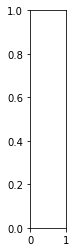

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

In [6]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

## Classification dengan SVC (Support Vector Classifier)

In [12]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Hyperparameter Tuning dengan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

## Predict & Evaluate

In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))